---

# Linear Regression 

The present project aims to 

# Task
This project analyzes the data on the quality of Arabica coffee, with the aim of finding a relationship between coffee production parameters and the results of cup quality evaluation.

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np 
import pandas as pd 
import seaborn as sns
import math

cafe = pd.read_csv("arabica_data_cleaned.csv") 
cafe.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


---

### Viewing the DataFrame
There are 44 columns in the data set. 

---

In [24]:
print (cafe.columns)
print (cafe['altitude_mean_meters'].value_counts())


Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')
1200.0    66
1100.0    52
1400.0    52
1300.0    50
1500.0    44
          ..
1473.0     1
3800.0     1
1425.0     1
1325.0     1
1676.5     1
Name: altitude_mean_meters, Length: 201, dtype: int64


In [25]:
print (cafe.isna().sum())
duplicates = cafe[cafe.duplicated()]
print('\nTotal duplicates:', len(duplicates))


Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

---
Some parameters do not have information (NaN) in the different columns. The main problem is the parameter Lot Number, which will not be considered in this or further analysis. I also check if there are duplicates in the database

---

### Organizing data and extracting the important 


A partir de la informacion original se escogen los parametros que van a ser considerados en este y lossiguientes analisis desarrollados a lo largo de los diferentes proyectos. Asi las cosas, se exporto la base de datos organizada y limpia con los parametros deseados, la cual sera el estandar para los siguientes proyectos de aula. 



In [26]:
new_df = cafe[["altitude_mean_meters","Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Variety",
       "Balance", "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points", "Moisture", "Country.of.Origin", 
             "Category.One.Defects", "Category.Two.Defects", "Total.Cup.Points" ]]
new_df.dropna(inplace=True)
temp=new_df[new_df["Total.Cup.Points"]<=4].index
cafe_2=new_df.drop(temp)
temp=cafe_2[cafe_2["altitude_mean_meters"]>=3000].index
cafe_3=cafe_2.drop(temp)
#cafe_3.to_csv(r'C:\Users\Windows 10\Desktop\RICE\SECOND SEMESTER\INDE 577 MACHINE LEARNING\Project\Coffee_data.csv')


<ipython-input-26-7ab7feea8f5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


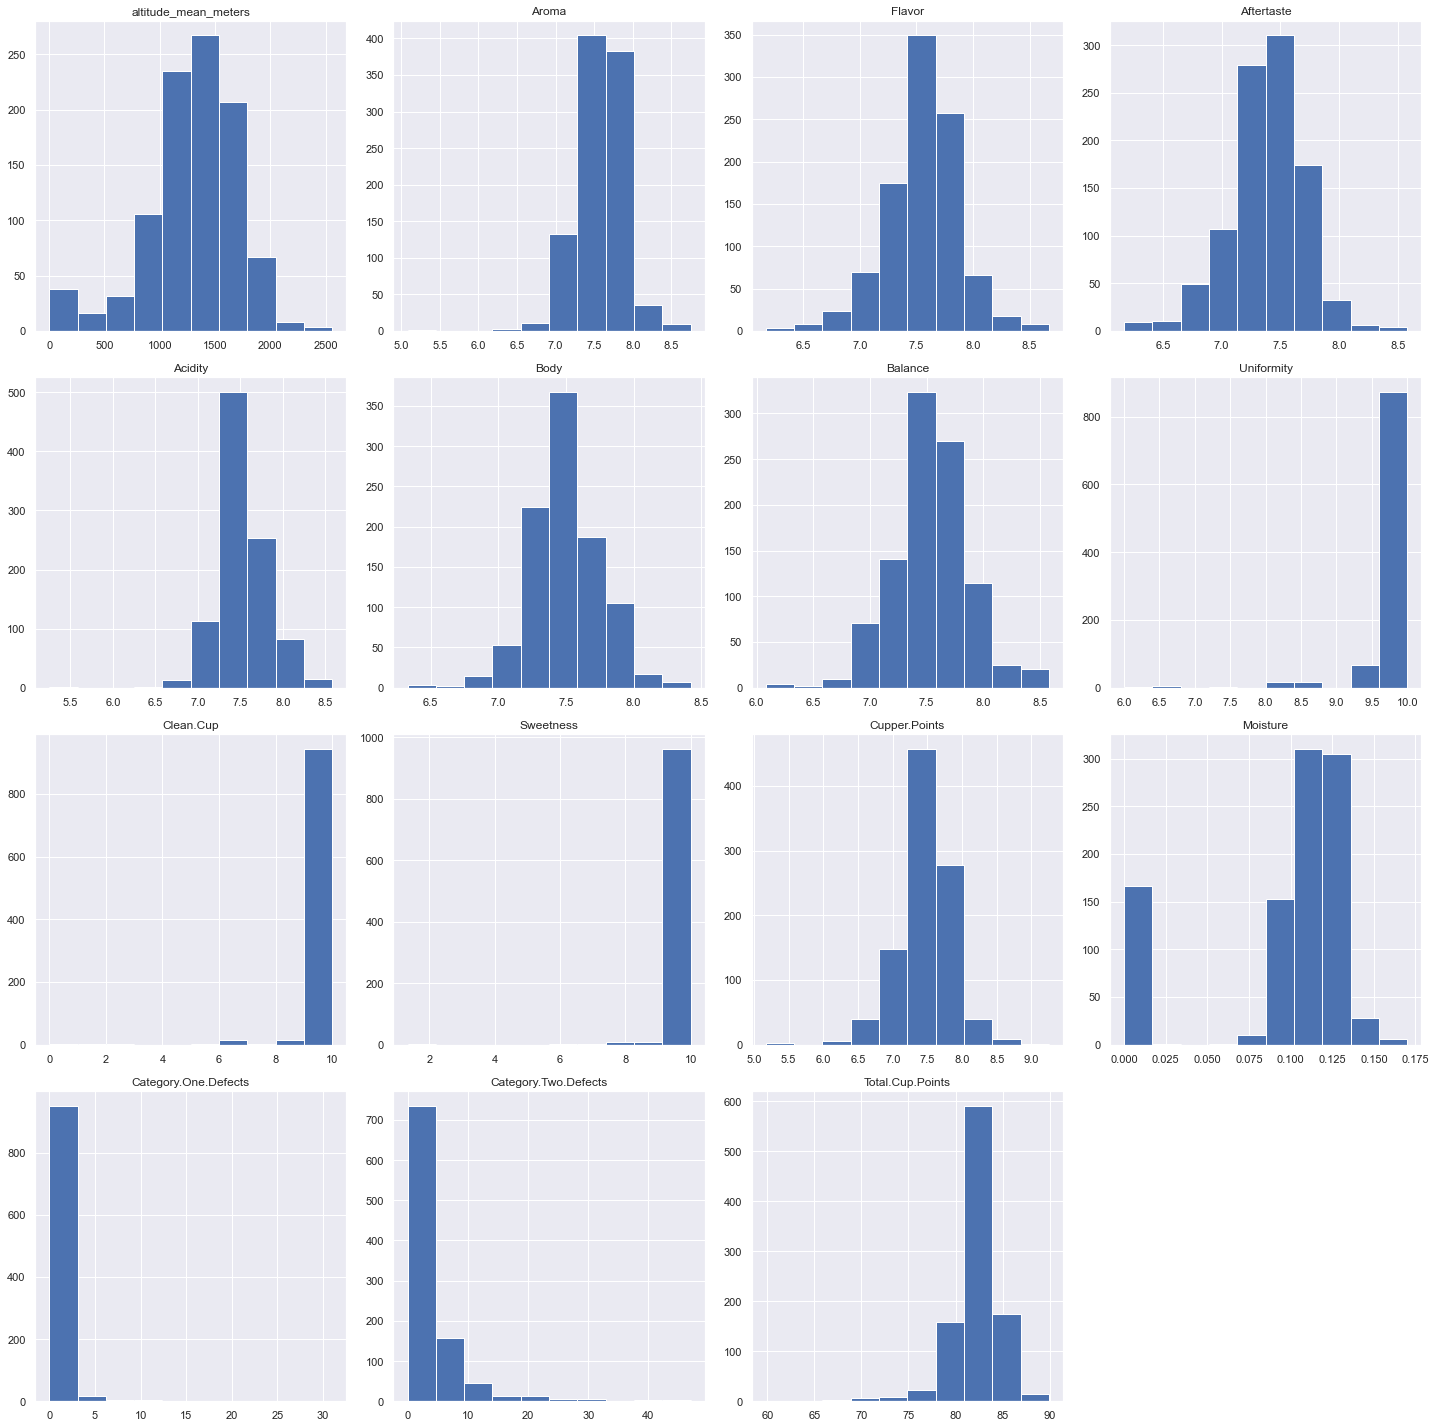

In [27]:
cafe_3.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

In [28]:
plt.figure(figsize=(20,16), dpi= 80)
# sns.heatmap(cafe_3.corr(), xticklabels=cafe_3.corr().columns, yticklabels=cafe_3.corr().columns, cmap='YlGnBu', 
            center=0, annot=True)

# Decorations
plt.yticks(fontsize=14)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=14)
plt.show()

IndentationError: unexpected indent (<ipython-input-28-936b5aa3414e>, line 3)

True


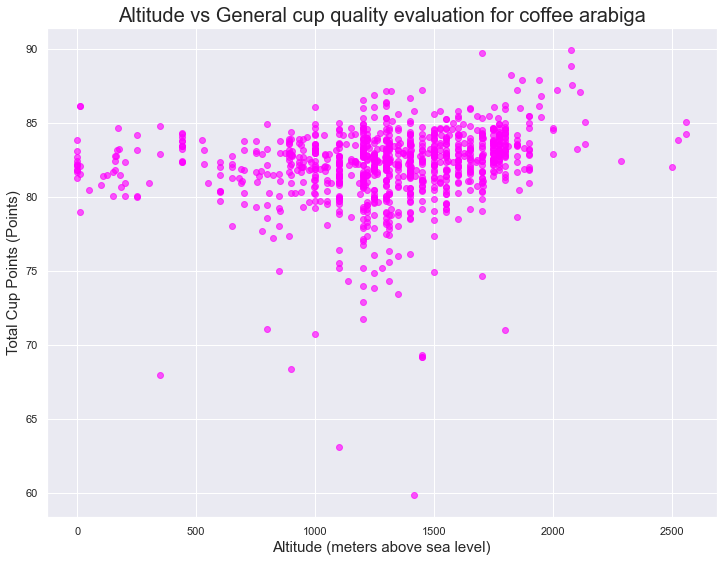

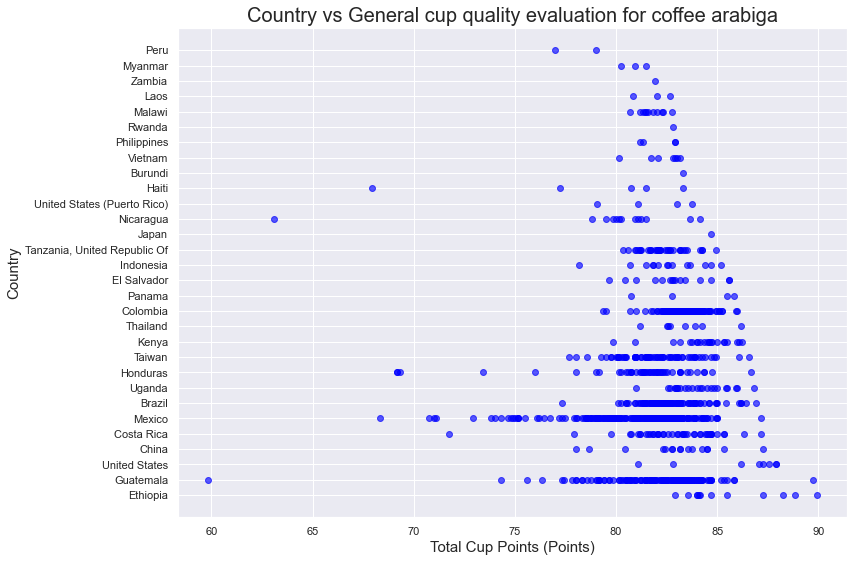

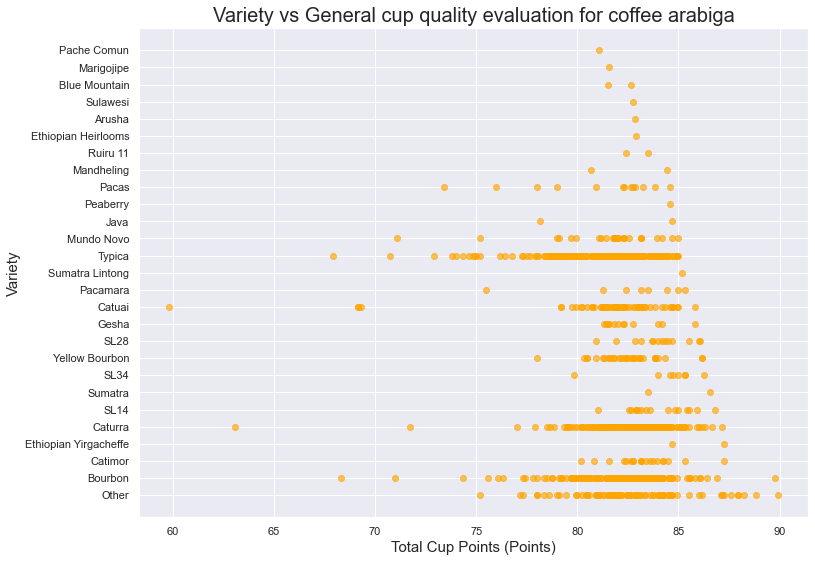

In [29]:
sns.set_theme()
X = []
y = []
z = []
v = []


#print (cafe_2.info())
for i, test_string in enumerate(cafe_3.altitude_mean_meters):
    try :
        float(test_string)
        X.append(float(test_string))
        y.append(cafe_3["Total.Cup.Points"].iloc[i])
        z.append(cafe_3["Country.of.Origin"].iloc[i])
        v.append(cafe_3["Variety"].iloc[i])
        
    except :
        None
print (isinstance(X[3],float))
plt.figure(figsize = (12, 9))
plt.scatter(X, y, color = "magenta", alpha = 0.65)
plt.xlabel("Altitude (meters above sea level)", fontsize = 15)
plt.title ("Altitude vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
plt.ylabel("Total Cup Points (Points)", fontsize = 15)
plt.show()
#cafe_3.isna().sum()  

plt.figure(figsize = (12, 9))
plt.scatter(y, z, color = "blue", alpha = 0.65)
plt.xlabel("Total Cup Points (Points)", fontsize = 15)
plt.title ("Country vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
plt.ylabel("Country", fontsize = 15)
plt.show()


plt.figure(figsize = (12, 9))
plt.scatter(y, v, color = "orange", alpha = 0.65)
plt.xlabel("Total Cup Points (Points)", fontsize = 15)
plt.title ("Variety vs General cup quality evaluation for coffee arabiga",  fontsize = 20)
plt.ylabel("Variety", fontsize = 15)
plt.show()


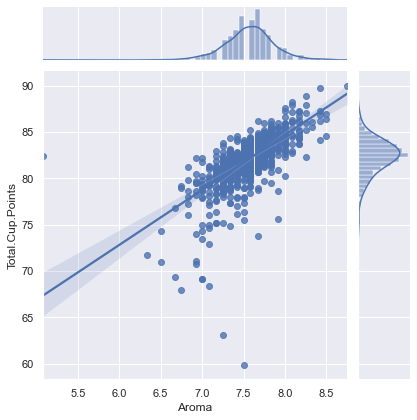

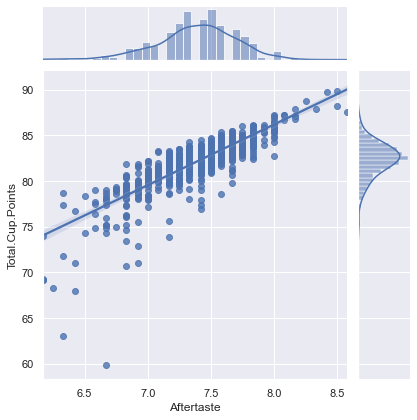

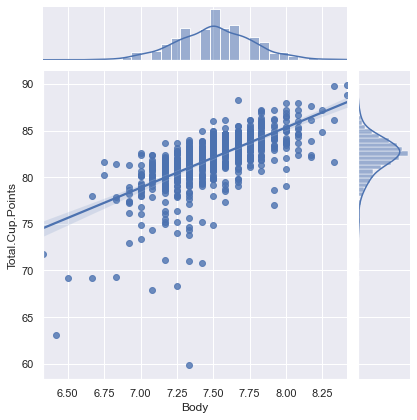

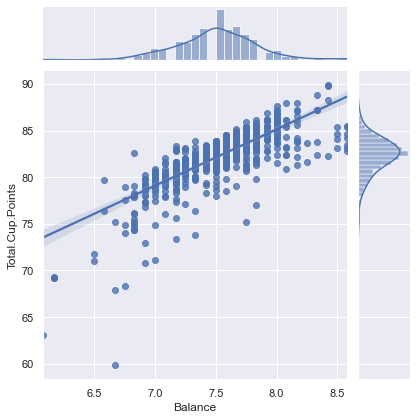

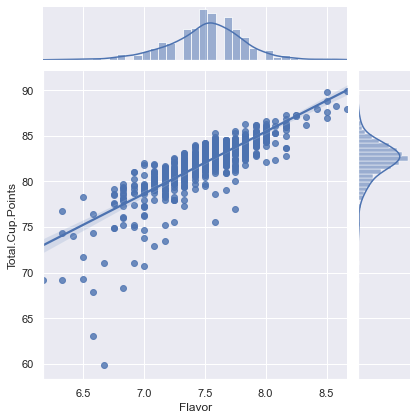

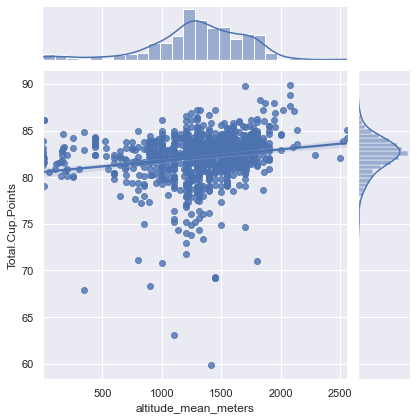

In [10]:
# Define list of continuous variables
continous_features = ['Aroma', 'Aftertaste', 'Body', 'Balance', 'Flavor', 'altitude_mean_meters']


#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = cafe_3[feature], y = cafe_3['Total.Cup.Points'], kind = 'reg')

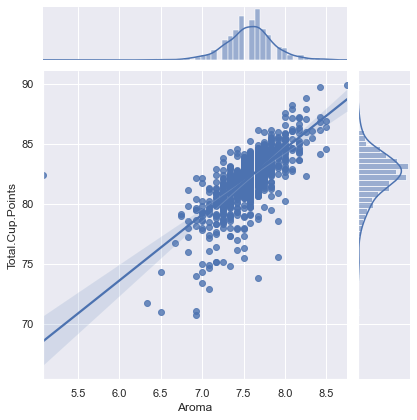

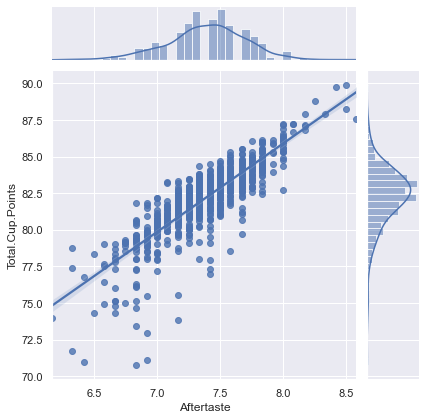

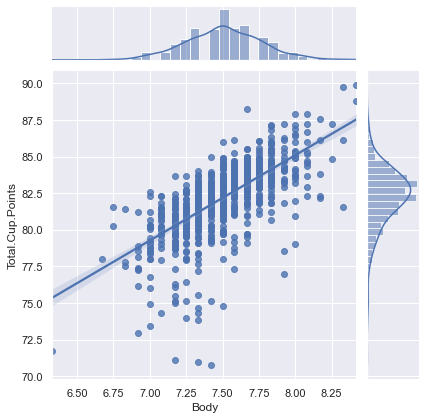

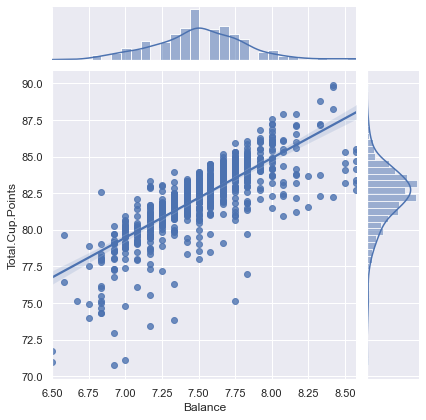

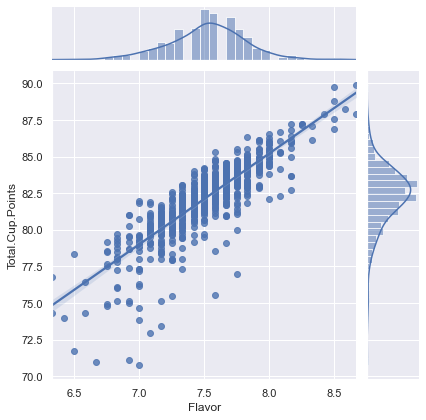

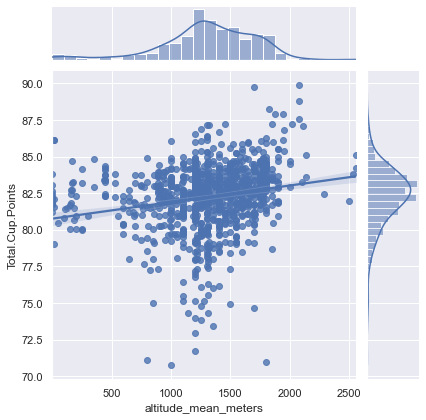

In [12]:
cafe_final = cafe_3[cafe_3['Total.Cup.Points'] >= 70]
for feature in continous_features:
    sns.jointplot(x = cafe_final[feature], y = cafe_final['Total.Cup.Points'], kind ='reg')

In [119]:
cafe_final.head()

,altitude_mean_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Category.Two.Defects,Total.Cup.Points
1,2075.0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,1,89.92
2,1700.0,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0,89.75
4,2075.0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,2,88.83
9,1822.5,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,0.10,0,4,88.25
11,1872.0,8.25,8.42,8.17,8.33,8.08,8.17,10.0,10.0,10.0,8.50,0.00,0,0,87.92


# Linear Regression

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

### Extracting data from Total cup points and altitude mean meters

In [19]:
X = cafe_final.drop('Total.Cup.Points', axis = 1)
y = cafe_final['Total.Cup.Points']
#15% of the data for test, 85 % for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#print(len(X_train), len(X_test), len(y_train), len(y_test))
X_train_alt =np.array(X_train['altitude_mean_meters']).reshape(-1,1)
y_train_alt = np.array(y_train).reshape(-1,1)

### Creating the linear regression function

In [30]:
def linear_reg_val(X_train, y_train):
    
    linreg.fit(X_train, y_train)
    # Evaluate using rmse
    scores = cross_val_score(
                linreg, 
                X_train,
                y_train,
                cv=10,
                scoring="neg_mean_squared_error"
    )

    linreg_score =linreg.score(X_train, y_train)
    rmse_scores = np.sqrt(-scores)
    print ('Rmse_scores:', rmse_scores)
    print ('Rmse_scores.mean:',rmse_scores.mean())
    print ('Rmse_scores.std:', rmse_scores.std())
    print ('Intercept:',linreg.intercept_)
    print ('Score:', linreg_score)


### Getting and ploting the final results

**Altitude**

Rmse_scores: [2.0355169  2.2998406  2.39338995 2.39691294 2.37358536 2.39516357
 2.04892055 2.0433744  2.21996793 2.08887938]
Rmse_scores.mean: 2.229555156582848
Rmse_scores.std: 0.1525732372747692
Intercept: 80.572500927575
Score: 0.0522045449395252


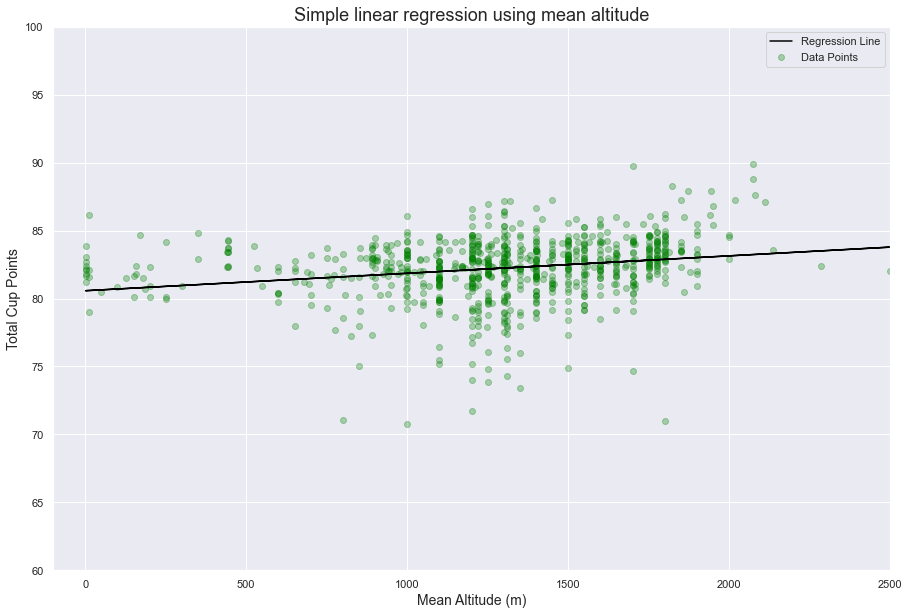

In [32]:
linreg = LinearRegression()
linear_reg_val(X_train_alt, y_train)
y_pred_alt = linreg.predict(X_train_alt)
# Get predictions

# Fit on training data
linreg.fit(X_train_alt, y_train)

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_alt[:2000], y = y_train[:2000], alpha = 0.3, label = 'Data Points', color = 'green')
plt.gca().set(xlim=(-100.0, 2500), ylim=(60, 100) )
# Plot regression line
plt.plot(X_train_alt, y_pred_alt, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using mean altitude', fontsize = 18)
plt.xlabel('Mean Altitude (m)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Aftertaste**

Rmse_scores: [1.08125767 1.07685513 1.11974547 1.45303795 1.46272757 1.10199069
 1.19483515 1.10054297 1.0202939  1.09320407]
Rmse_scores.mean: 1.1704490578736233
Rmse_scores.std: 0.14941567605338835
Intercept: [37.22977308]
Score: 0.7349720745486862


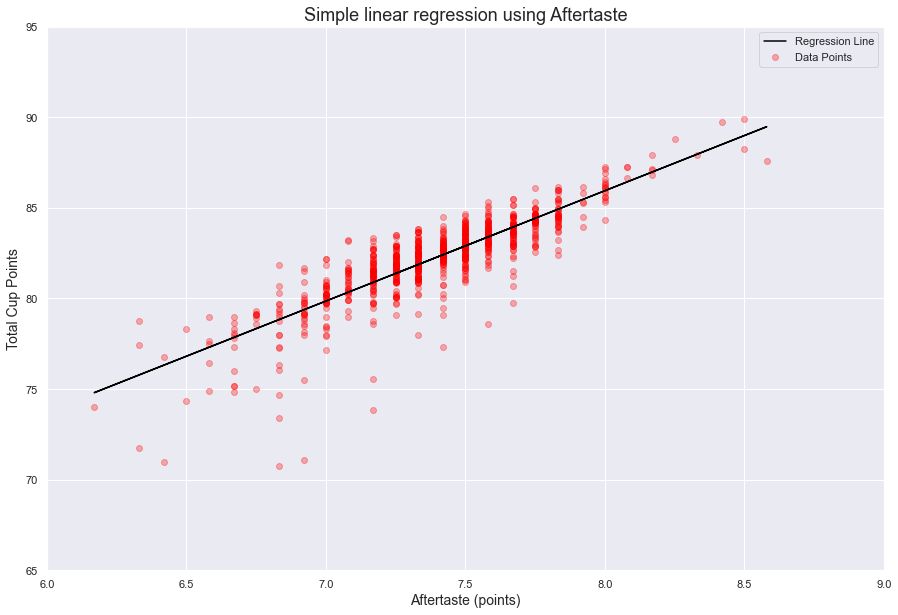

In [33]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Aftertaste']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)

    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'red')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Aftertaste', fontsize = 18)
plt.xlabel('Aftertaste (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Aroma**

Rmse_scores: [1.19877701 1.23175039 1.32685763 1.65256901 2.43508104 1.59961873
 1.58661858 1.61348178 1.51912676 1.48288344]
Rmse_scores.mean: 1.5646764367044306
Rmse_scores.std: 0.3285511298227008
Intercept: [40.93399373]
Score: 0.5256229775245018


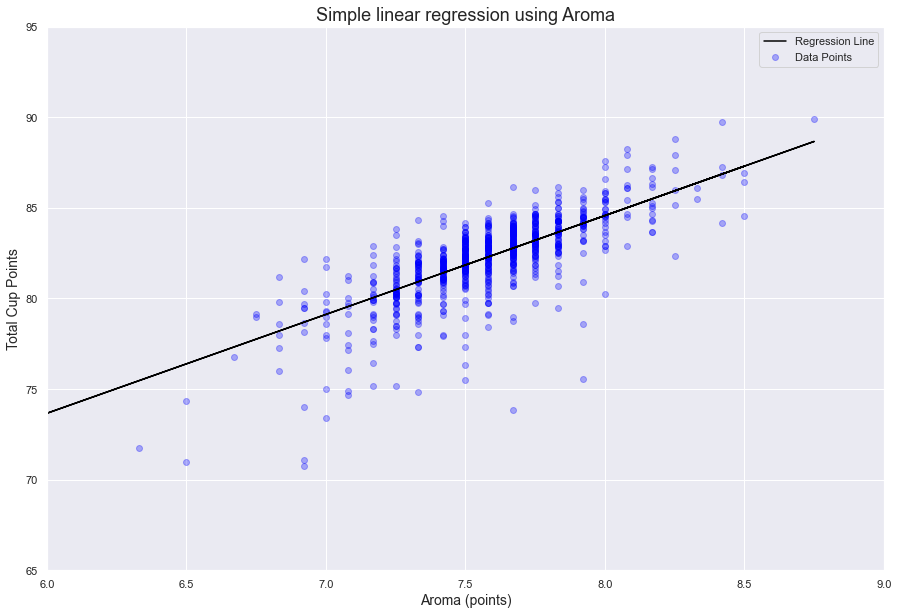

In [34]:
X_train_aro =np.array(X_train['Aroma']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
linreg = LinearRegression()
    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'blue')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Aroma', fontsize = 18)
plt.xlabel('Aroma (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Body**

Rmse_scores: [1.26680481 1.75481946 1.86425929 2.02080446 2.06187923 1.65014508
 1.54067665 1.41605395 1.24911869 1.47847144]
Rmse_scores.mean: 1.6303033070001312
Rmse_scores.std: 0.27637000724077104
Intercept: [37.16990353]
Score: 0.480748797547793


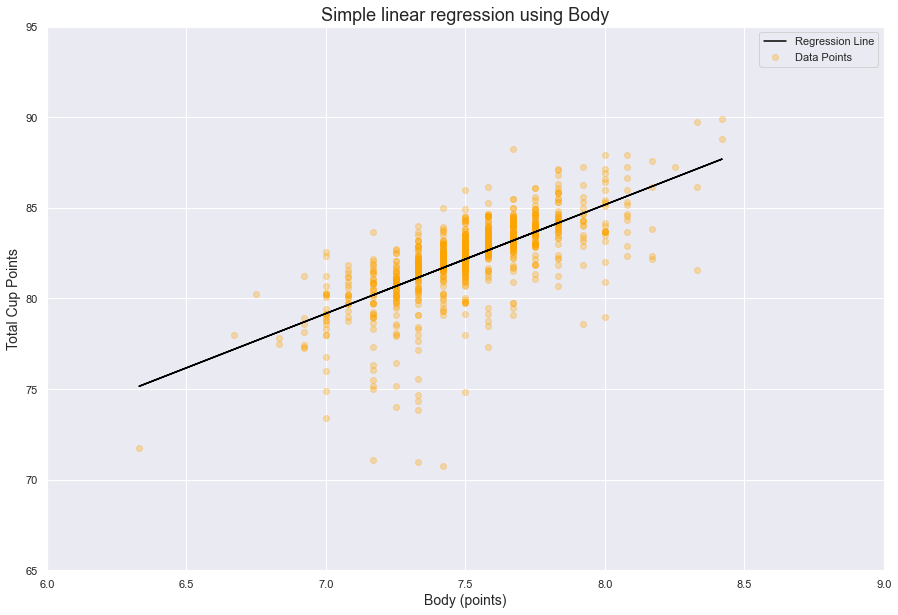

In [35]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Body']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)

    # Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = 'orange')
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Body', fontsize = 18)
plt.xlabel('Body (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

**Balance**

Rmse_scores: [1.29163667 1.15524293 1.41391925 1.71004668 1.69678317 1.44946291
 1.28418792 1.352789   1.20951446 1.4251708 ]
Rmse_scores.mean: 1.3988753784200416
Rmse_scores.std: 0.17636471653221786
Intercept: [40.73981795]
Score: 0.6233431833728467


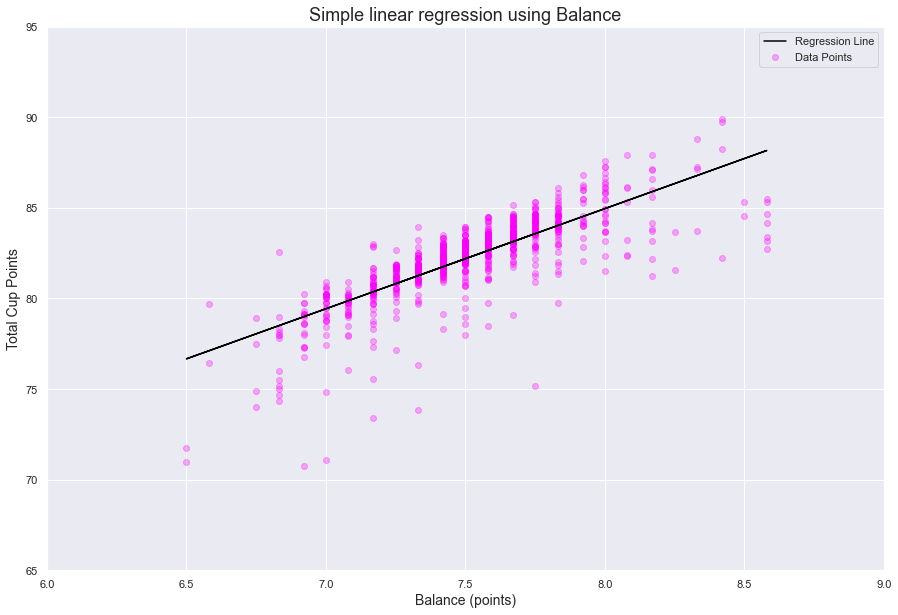

In [36]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Balance']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
# Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = "magenta")
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Balance', fontsize = 18)
plt.xlabel('Balance (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()

Rmse_scores: [1.00523725 1.15708004 1.01448536 1.28242852 1.41781923 1.10410808
 1.12038603 1.22904364 1.04409134 1.07515774]
Rmse_scores.mean: 1.1449837238354432
Rmse_scores.std: 0.12427082546336263
Intercept: [34.78537067]
Score: 0.7475025745379469


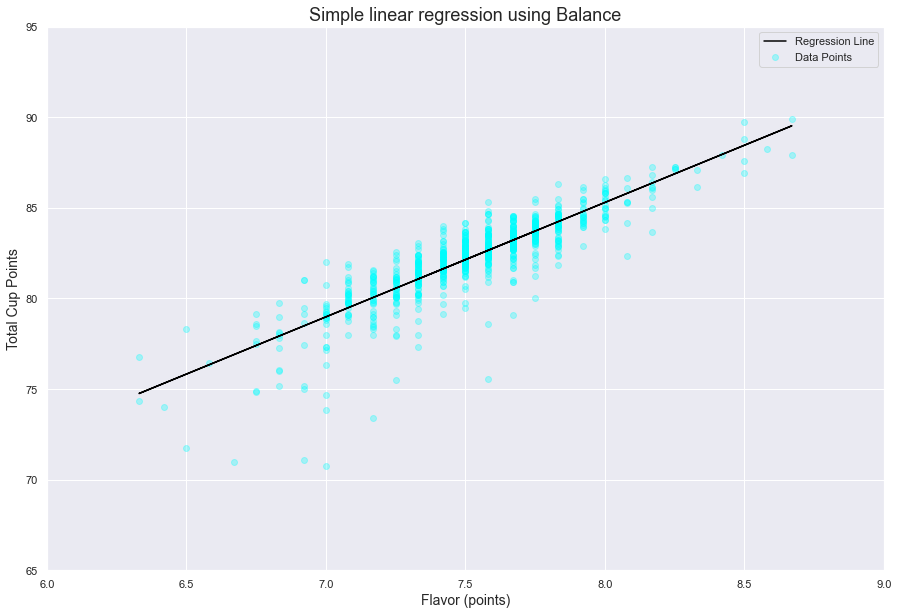

In [38]:
linreg = LinearRegression()
X_train_aro =np.array(X_train['Flavor']).reshape(-1,1)
y_train_aro=y_train_alt
linear_reg_val(X_train_aro, y_train_aro)
# Fit on training data
linreg.fit(X_train_aro, y_train_aro)

y_pred_aro = linreg.predict(X_train_aro)
# Get predictions

# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_aro[:2000], y = y_train_aro[:2000], alpha = 0.3, label = 'Data Points', color = "cyan")
plt.gca().set(xlim=(6, 9), ylim=(65, 95) )
# Plot regression line
plt.plot(X_train_aro, y_pred_aro, color = 'black', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using Balance', fontsize = 18)
plt.xlabel('Flavor (points)', fontsize = 14)
plt.ylabel('Total Cup Points', fontsize = 14)
plt.show()
plt.close()